In [1]:
# Import
from helper_functions.load_data import load_data
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##### Read in data
Briefly explore dataset

In [2]:
# Testing environment parameters
random_state = 42
# * Read data
bike = load_data(
    "train.csv",
    subfolder="data/bike-sharing-demand/",
    sep=",",
    parse_dates=[0],
)
bike.head()


Loading in train.csv...
Data set successfully loaded.



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
print(
    bike["weather"].value_counts()
)  # imbalanced, and only a single heavy rain / 4 level, we will drop this level/row later
print(bike["season"].value_counts())  # balanced
print(bike["holiday"].value_counts())  # imbalanced
print(bike["workingday"].value_counts())  # imbalanced
bike.describe()


1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
0    10575
1      311
Name: holiday, dtype: int64
1    7412
0    3474
Name: workingday, dtype: int64


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


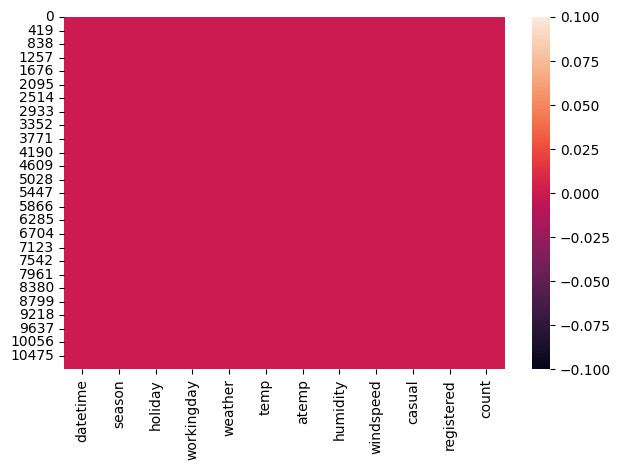

In [5]:
# Drop duplicates and check for NaNs
bike = bike.drop_duplicates()
print(bike.isna().sum())
sns.heatmap(bike.isna())
plt.tight_layout()


Do some datetime exercises>

In [6]:
# Extract features like hour, month etc. from the datetime column.
bike["datetime"].dt.year
bike["datetime"].dt.quarter
bike["datetime"].dt.month
bike["datetime"].dt.day
bike["datetime"].dt.hour
bike["datetime"].dt.day_name()


In [7]:
# Transform into DateTimeIndex
bike = bike.set_index("datetime")
# Day
bike.loc["1/1/2011"]
# Week (by range)
bike.loc["1/1/2011":"1/7/2011"]


In [8]:
# "3W" = every three weeks but note: it will go over real three weeks, starting with Monday (start of the week)
# not following 21 days existing in the dataset (which may be more or less than days in actual three week)
bike.resample("3W").mean()
bike.resample("M").sum()  # every month
bike.resample(
    "7D"
).mean()  # every seven days, starting at the first day (not necessarily the beginning of the week)
bike.resample("6H").sum()  # every six hours
bike.resample(
    "4T"
).mean()  # every four minutes (Note: since bike data is hourly here, we will get NaNs for non-full hours)


In [9]:
bike.rolling(
    window="3H"
).mean()  # backwards rolling - i.e. average across 3Hs before. Note: you can change that with parameters
bike["temp"].rolling(window="2D").sum()


datetime
2011-01-01 00:00:00      9.84
2011-01-01 01:00:00     18.86
2011-01-01 02:00:00     27.88
2011-01-01 03:00:00     37.72
2011-01-01 04:00:00     47.56
                        ...  
2012-12-19 19:00:00    744.56
2012-12-19 20:00:00    742.10
2012-12-19 21:00:00    738.82
2012-12-19 22:00:00    735.54
2012-12-19 23:00:00    731.44
Name: temp, Length: 10886, dtype: float64

In [10]:
# EDA so far suggests that we might need some more more sophisticated time columns
# Note: these will not go into the model for now
bike["Year"] = bike.index.year
bike["Month"] = bike.index.month
bike["Week"] = bike.index.isocalendar().week
bike["Day of Year"] = bike.index.day_of_year
bike["Weekday"] = bike.index.weekday
bike["Day"] = bike.index.day
bike["Hour"] = bike.index.hour
bike


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Week,Day of Year,Weekday,Day,Hour
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,52,1,5,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,52,1,5,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,52,1,5,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,52,1,5,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,52,1,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,51,354,2,19,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,51,354,2,19,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,51,354,2,19,21


##### EDA: Exploratory data analysis
Create some styling things, we'll later use


In [11]:
# plt.style.use("seaborn-dark")
sns.set_style("ticks")
sns.set_context("paper")
# Note "vlag" is similar to "RdBu_r". While being perceptually similar it not as saturated.
palette = sns.color_palette("RdBu_r", as_cmap=True)
palette_i = sns.color_palette("RdBu_r")


Let's first visualize the relations among the variables with correlation matrices.

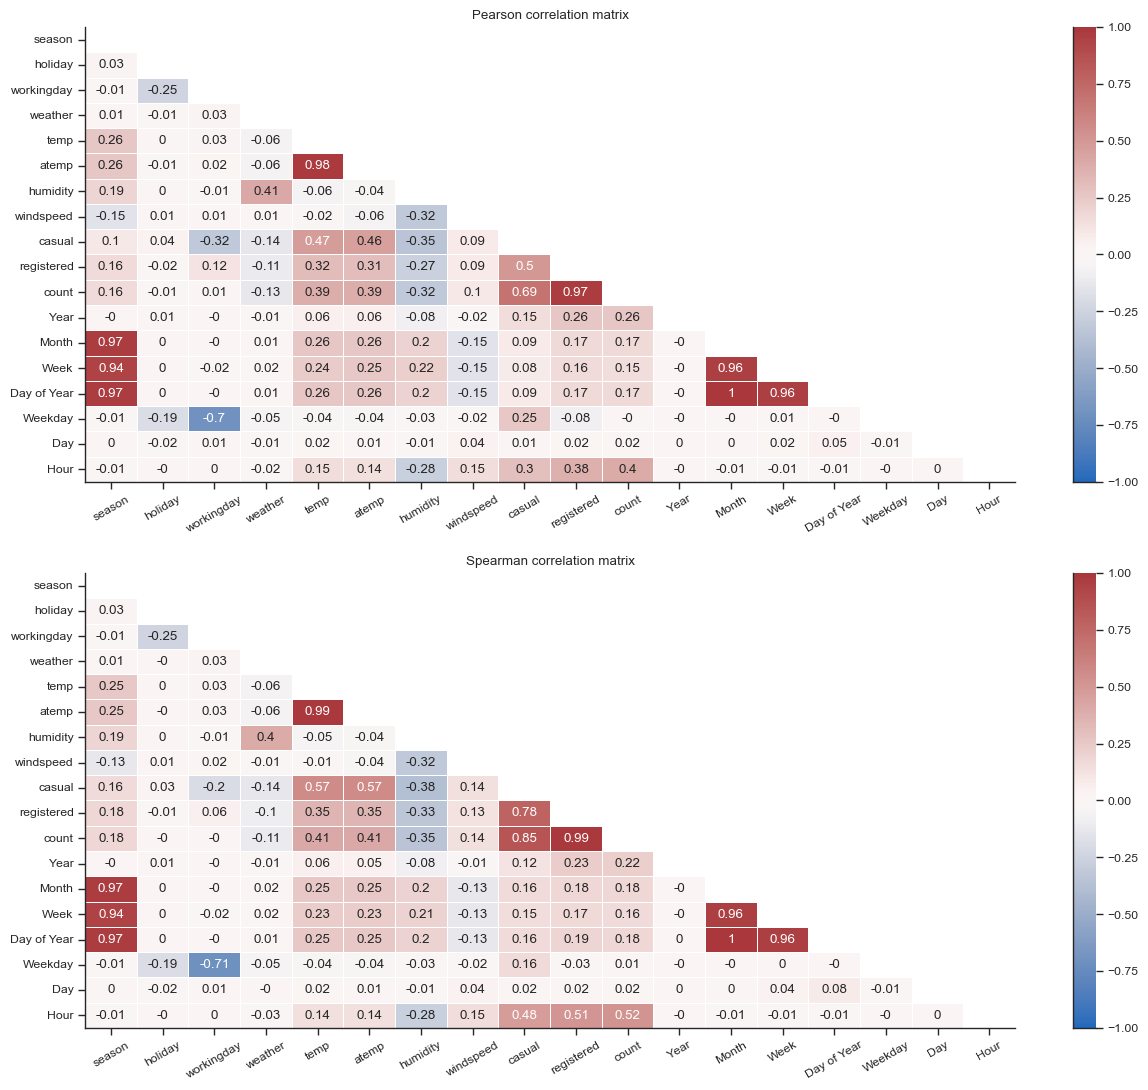

In [12]:
# Creating mask to get a triangle matrix
mask = np.triu(np.ones_like(bike.corr()))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 13))
sns.heatmap(
    bike.corr("pearson").round(2),
    annot=True,
    cmap="vlag",
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    ax=ax1,
    mask=mask,
)
ax1.set_title("Pearson correlation matrix")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
sns.heatmap(
    bike.corr("spearman").round(2),
    annot=True,
    cmap="vlag",
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    ax=ax2,
    mask=mask,
)
ax2.set_title("Spearman correlation matrix")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
sns.despine()
plt.show()


Another way of depicting the relationships without assuming linearity is a pairplot with regression lines (only useful for numeric columns).

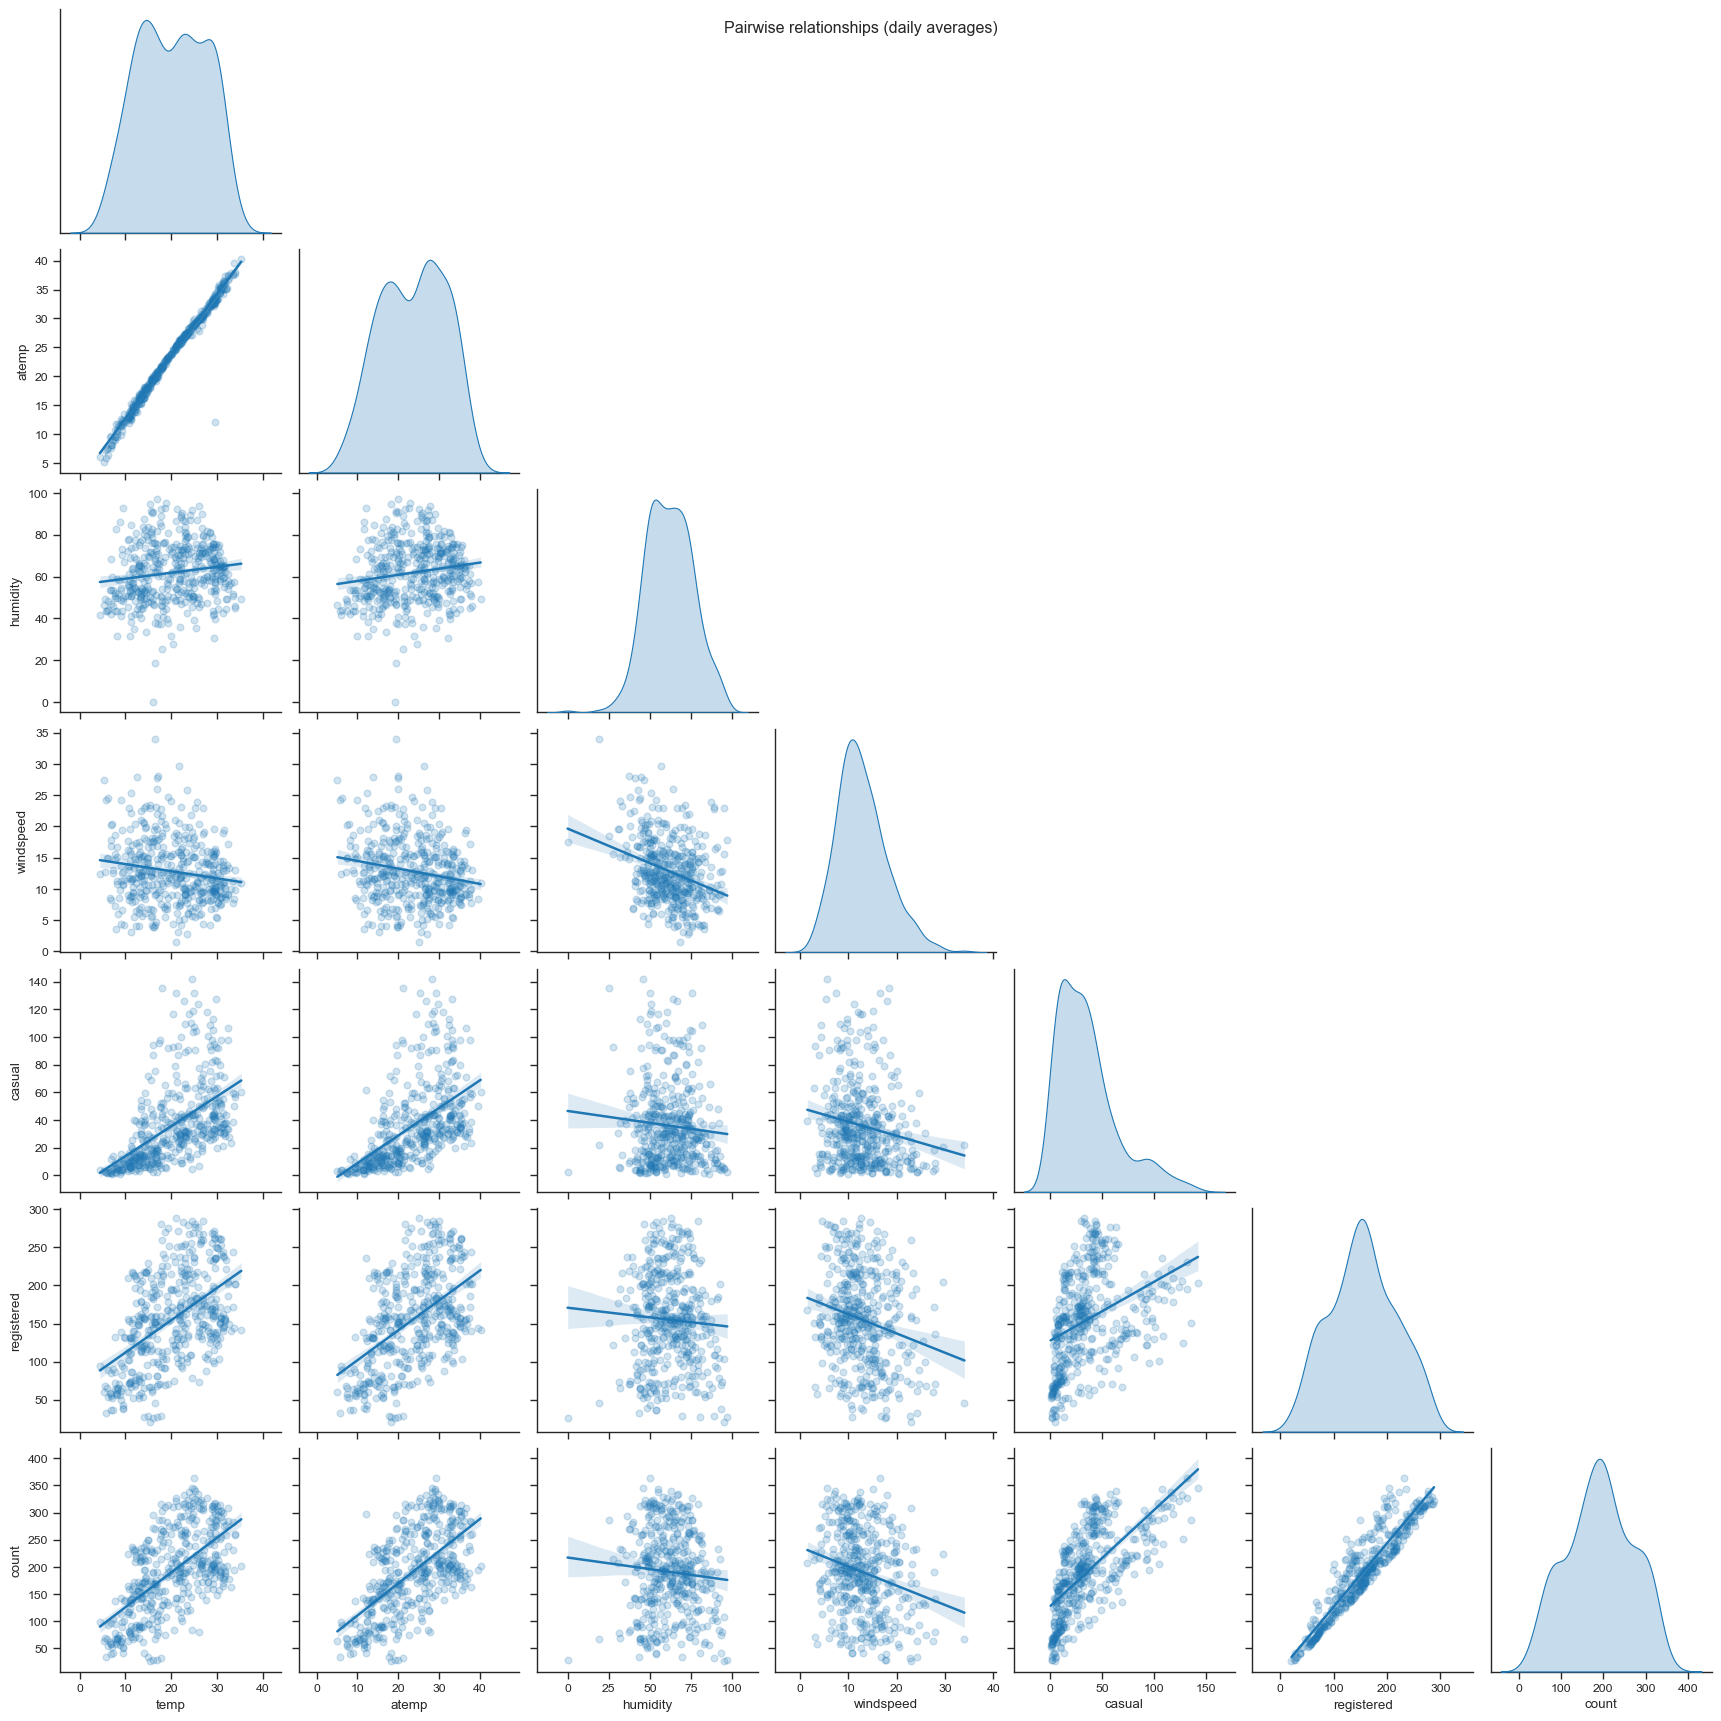

In [13]:

bike_plot = (
    bike[["temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]]
    .resample("D")
    .mean()
)
ax = sns.pairplot(data=bike_plot, kind="reg", corner=True, dropna=True, diag_kind="kde", plot_kws={'scatter_kws': {'alpha': 0.2}})
ax.fig.suptitle("Pairwise relationships (daily averages)")
sns.despine()


We should note that the Spearman correlation matrix is preferred here,
since we know some variables are ordinal and since we do not really know
whether Pearson's linearity assumption holds for the numerical ones.
We see in the pairplot, that some numerical relationships are likely to
be not linear (e.g. atemp/temp vs casual).  
We should not though, that pairplots show **marginal dependencies** (unlike coefficients which we see later). That means, they describe the behavior of a specific variable without keeping the others fixed. This means mediating and moderating variables could still influence the relationships between two single variables depicted here.


The above correlations answer some of these questions:  
Which factors contribute most to the number of bicycles being checked out over the course of a given day?  
Temperature/Subj. Temperature, humidity, weather, working day  
How much of an impact does weather have on demand?  
The weather causes all, casuals and registered, to rent less often when it's bad, and more so when it's warm (especially the casuals).  
How does the behavior of casual users differ from subscribers?  
Casuals rent on non-working days (and a bit more on holidays)  
Registered are more likely to rent during work days and less likely on holidays, and seem to rent a bit more towards late in the year

Frequency of the target (dependent variable)

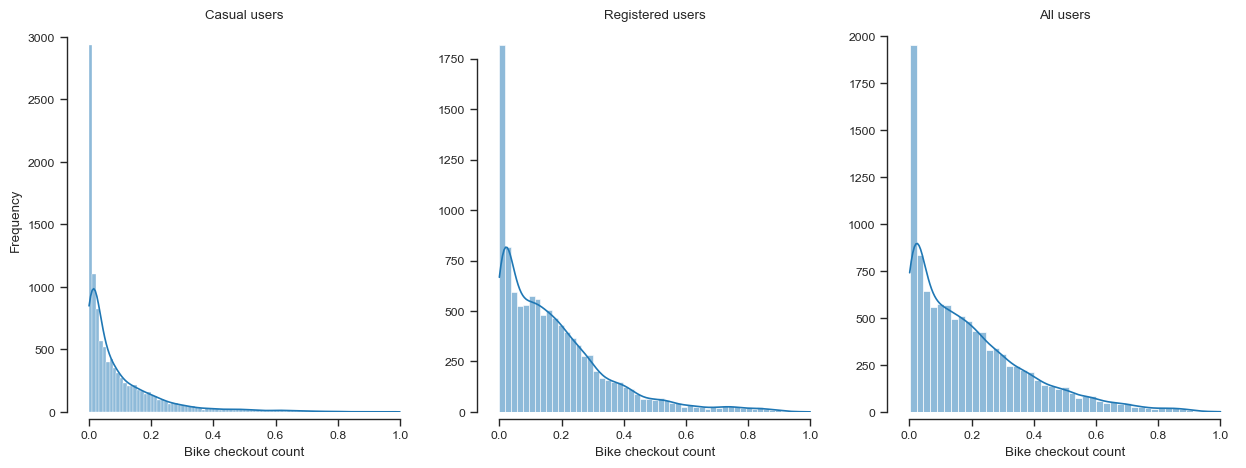

In [14]:
# Lets explore the independent variable count (and also casual and registered)
# But to better interpret the data, rescale the data
bike_plot = pd.DataFrame()
bike_plot["count"] = bike["count"] / bike["count"].max()
bike_plot["registered"] = bike["registered"] / bike["registered"].max()
bike_plot["casual"] = bike["casual"] / bike["casual"].max()
# or plot absolute:
#bike_plot = bike[["casual", "registered", "count"]]

# Plot the frequency of rentals
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(
    ax=ax1,
    data=bike_plot,
    x="casual",
    kde=True,
    # bins=30,
    #binwidth=25,
)
ax1.set_title("Casual users")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Bike checkout count")
#ax1.set_xlim((0, 1000))
sns.histplot(
    ax=ax2,
    data=bike_plot,
    x="registered",
    kde=True,
    # bins=30,
    #binwidth=25,
)
ax2.set_title("Registered users")
ax2.set_ylabel("")
ax2.set_xlabel("Bike checkout count")
#ax2.set_xlim((0, 1000))
sns.histplot(
    ax=ax3,
    data=bike_plot,
    x="count",
    kde=True,
    # bins=30,
    #binwidth=25,
)
ax3.set_title("All users")
ax3.set_ylabel("")
ax3.set_xlabel("Bike checkout count")
#ax3.set_xlim((0, 1000))
sns.despine(offset=5, trim=True)


Since the outcome variable is clearly not normally distributed, we can try to log-transform the data

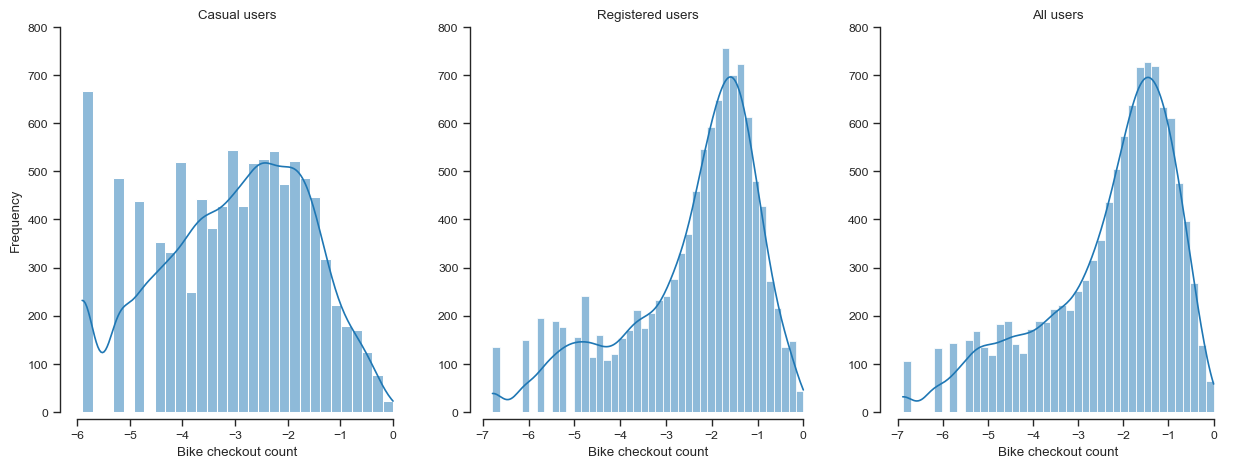

In [15]:
bike_plot = bike_plot.apply(np.log, axis=1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(
    ax=ax1,
    data=bike_plot,
    x="casual",
    kde=True,
    # bins=30,
    # binwidth=25,
)
ax1.set_title("Casual users")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Bike checkout count")
ax1.set_ylim((0, 800))
sns.histplot(
    ax=ax2,
    data=bike_plot,
    x="registered",
    kde=True,
    # bins=30,
    # binwidth=25,
)
ax2.set_title("Registered users")
ax2.set_ylabel("")
ax2.set_xlabel("Bike checkout count")
ax2.set_ylim((0, 800))
sns.histplot(
    ax=ax3,
    data=bike_plot,
    x="count",
    kde=True,
    # bins=30,
    # binwidth=25,
)
ax3.set_title("All users")
ax3.set_ylabel("")
ax3.set_xlabel("Bike checkout count")
ax3.set_ylim((0, 800))
sns.despine(offset=5, trim=True)


Rentals against season

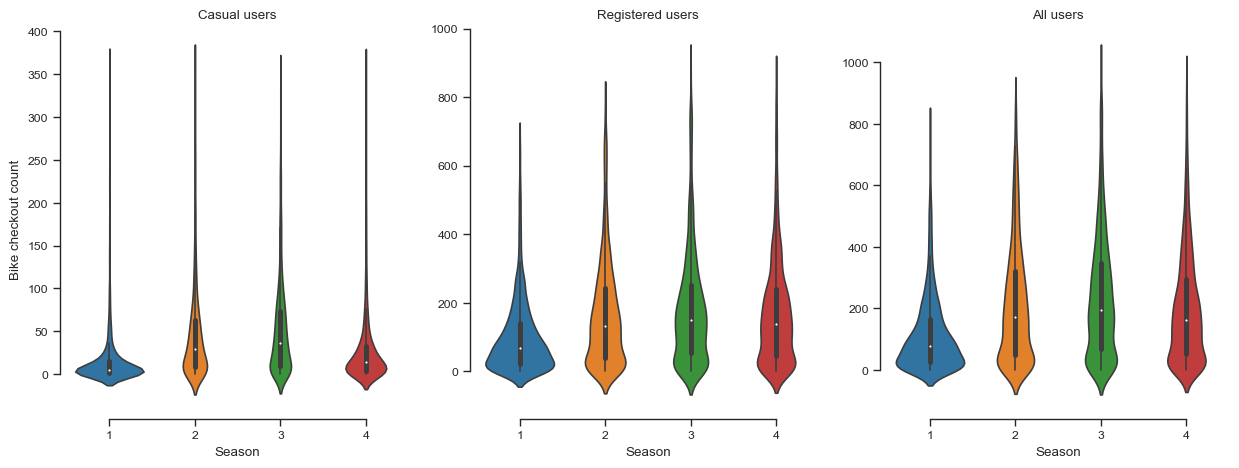

In [16]:
bike_plot = bike[["season", "casual", "registered", "count"]]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(
    ax=ax1,
    data=bike_plot,
    x="season",
    y="casual",
)
ax1.set_title("Casual users")
ax1.set_ylabel("Bike checkout count")
ax1.set_xlabel("Season")
sns.violinplot(
    ax=ax2,
    data=bike_plot,
    x="season",
    y="registered",
)
ax2.set_title("Registered users")
ax2.set_ylabel("")
ax2.set_xlabel("Season")
sns.violinplot(
    ax=ax3,
    data=bike_plot,
    x="season",
    y="count",
)
ax3.set_title("All users")
ax3.set_ylabel("")
ax3.set_xlabel("Season")
sns.despine(offset=5, trim=True)


Rentals against season (with outliers)

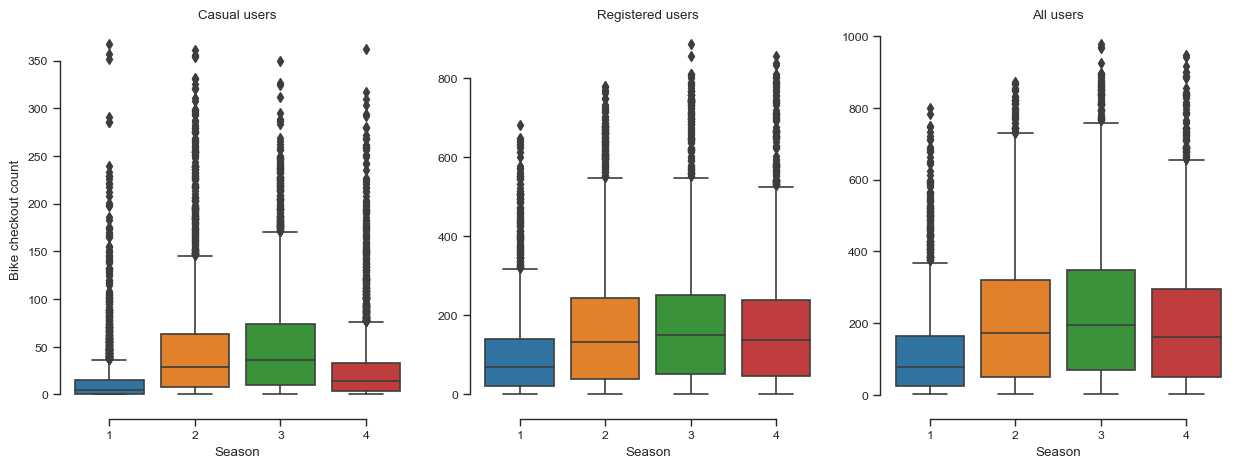

In [17]:
bike_plot = bike[["season", "casual", "registered", "count"]]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(
    ax=ax1,
    data=bike_plot,
    x="season",
    y="casual",
)
ax1.set_title("Casual users")
ax1.set_ylabel("Bike checkout count")
ax1.set_xlabel("Season")
sns.boxplot(
    ax=ax2,
    data=bike_plot,
    x="season",
    y="registered",
)
ax2.set_title("Registered users")
ax2.set_ylabel("")
ax2.set_xlabel("Season")
sns.boxplot(
    ax=ax3,
    data=bike_plot,
    x="season",
    y="count",
)
ax3.set_title("All users")
ax3.set_ylabel("")
ax3.set_xlabel("Season")
sns.despine(offset=5, trim=True)


Working day against Checkout count at varying holidays for Casual and Registered check-outs seperately  

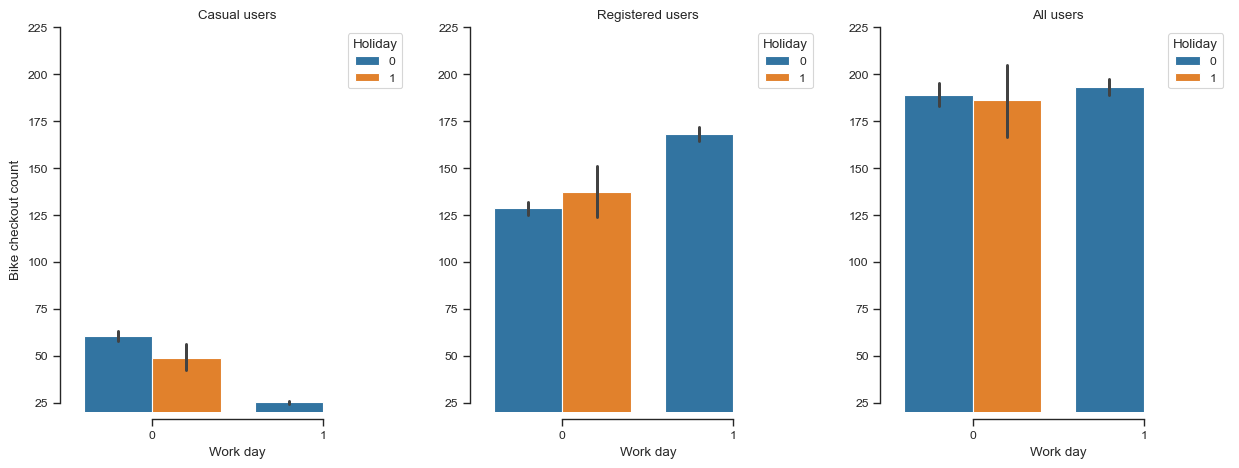

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(
    ax=ax1,
    data=bike,
    hue="holiday",
    x="workingday",
    y="casual",
)
ax1.set_title("Casual users")
ax1.set_ylabel("Bike checkout count")
ax1.set_xlabel("Work day")
ax1.set_ylim(20, 225)
ax1.legend(title="Holiday", loc="upper right")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
sns.barplot(
    ax=ax2,
    data=bike,
    hue="holiday",
    x="workingday",
    y="registered",
)
ax2.set_title("Registered users")
ax2.legend(title="Holiday", loc="upper right")
ax2.set_xlabel("Work day")
ax2.set_ylabel("")
ax2.set_ylim(20, 225)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
sns.barplot(
    ax=ax3,
    data=bike,
    hue="holiday",
    x="workingday",
    y="count",
)
ax3.set_title("All users")
ax3.legend(title="Holiday", loc="upper right")
ax3.set_xlabel("Work day")
ax3.set_ylabel("")
ax3.set_ylim(20, 225)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30)
sns.despine(offset=5, trim=True)


Time (average weekly) against Checkout count at varying temperatures for Casual and Registered check-outs seperately

C:\Users\miche\AppData\Local\Temp\ipykernel_35900\4167915979.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
C:\Users\miche\AppData\Local\Temp\ipykernel_35900\4167915979.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
C:\Users\miche\AppData\Local\Temp\ipykernel_35900\4167915979.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30)


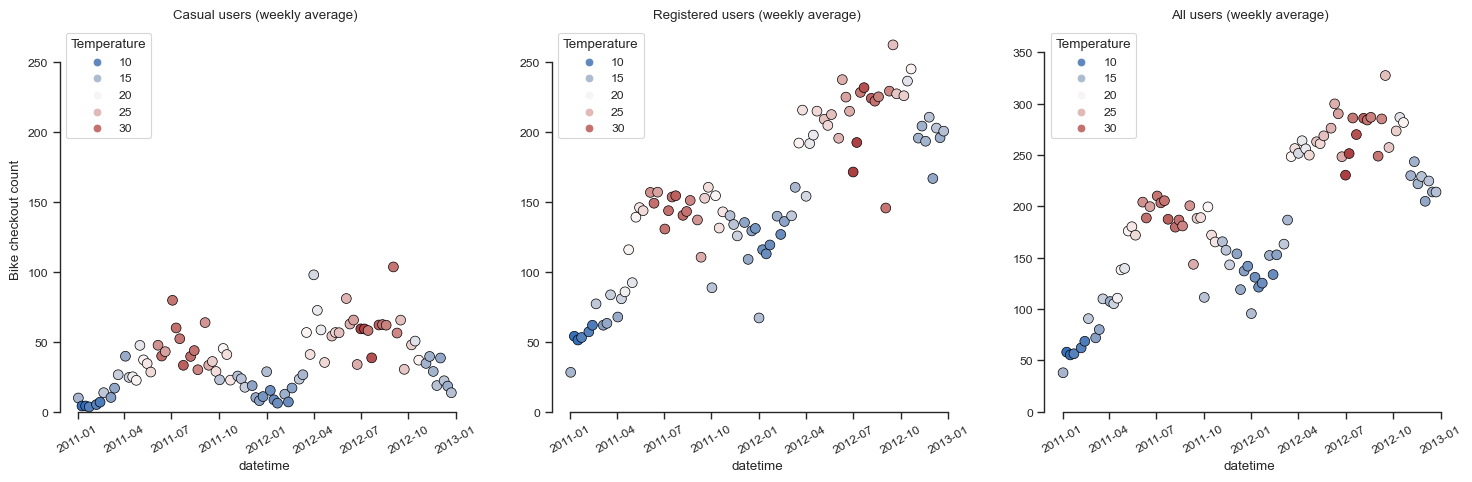

In [19]:
bike_plot = (
    bike[["temp", "casual", "registered", "count"]].resample("W").mean().dropna()
)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(
    ax=ax1,
    data=bike_plot,
    hue="temp",
    hue_norm=(np.floor(bike_plot["temp"].min()), np.ceil(bike_plot["temp"].max())),
    x=bike_plot.index,
    y="casual",
    linewidth=0.5,
    edgecolor="black",
    palette="vlag",
    s=50,
)
ax1.set_title("Casual users (weekly average)")
ax1.set_ylabel("Bike checkout count")
ax1.legend(title="Temperature", loc="upper left")
ax1.set_ylim(0, 275)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
sns.scatterplot(
    ax=ax2,
    data=bike_plot,
    hue="temp",
    hue_norm=(np.floor(bike_plot["temp"].min()), np.ceil(bike_plot["temp"].max())),
    x=bike_plot.index,
    y="registered",
    linewidth=0.5,
    edgecolor="black",
    palette="vlag",
    s=50,
)
ax2.set_title("Registered users (weekly average)")
ax2.legend(title="Temperature", loc="upper left")
ax2.set_ylabel("")
ax2.set_ylim(0, 275)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
sns.scatterplot(
    ax=ax3,
    data=bike_plot,
    hue="temp",
    hue_norm=(np.floor(bike_plot["temp"].min()), np.ceil(bike_plot["temp"].max())),
    x=bike_plot.index,
    y="count",
    linewidth=0.5,
    edgecolor="black",
    palette="vlag",
    s=50,
)
ax3.set_title("All users (weekly average)")
ax3.legend(title="Temperature", loc="upper left")
ax3.set_ylabel("")
ax3.set_ylim(0, 375)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30)
sns.despine(trim=True)


The previous graph shows a number of things:
1. Checkouts have increased from one year to another. 
2. Checkouts increase with an increase in temperature
3. This increase is even more aggrevated in casual users (in relative terms) for temperatures above 25-27+ °C 
(we see this also in the pairplot expressed as non-linear relationship). 
Note that this relatinship seems to disappear when collapsing across all users. Likely because there are way more registered than casual users.
Possible interpretation: Casual users consist of those who exhibit registered users behavior who may just not use it enough to subscribe and 
users who really just use it during the summer time.
4. Checkouts increase half-way through each of the years (collinearity between season and temperature)
5. The pattern of seasonality (see 4.) suggests we might need to try out some binomial fitting to capture the "camel-like" shape of the data.

Let's plot more patterns across time:  
First, month against rentals for each year seperately

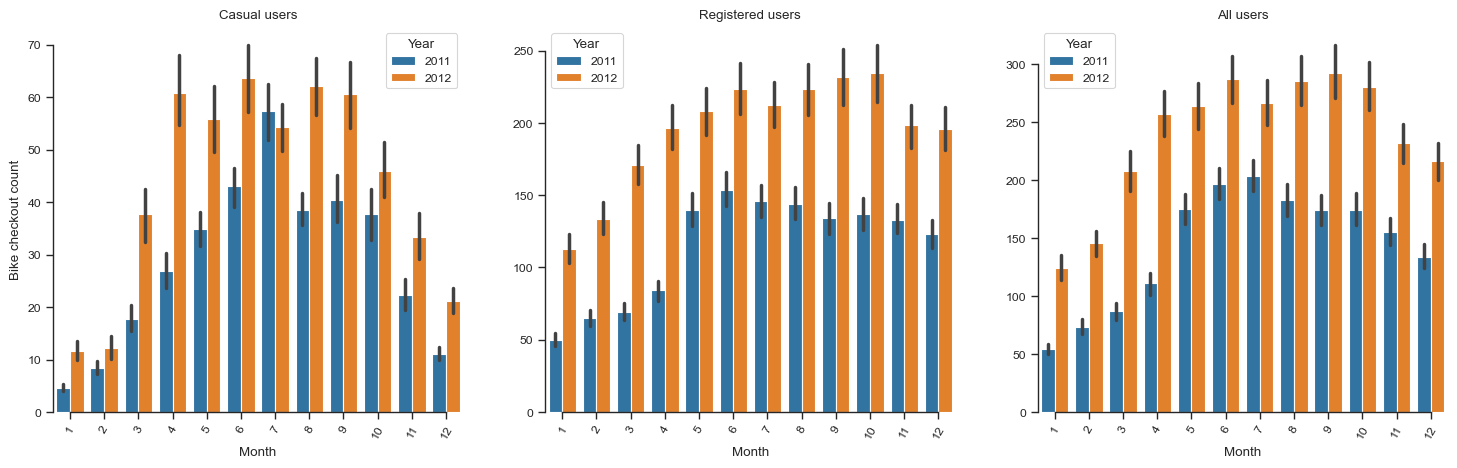

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
# Can be done like this:
# sns.barplot(data=bike.resample("M").mean(), y="count", x=bike.resample("M").mean().index.month)
# Or just use the previously created variable:
sns.barplot(
    ax=ax1,
    data=bike,
    x="Month",
    y="casual",
    hue="Year",
    errwidth=2.5,
)
ax1.set_title("Casual users")
ax1.set_ylabel("Bike checkout count")
ax1.set_xlabel("Month")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)
sns.barplot(
    ax=ax2,
    data=bike,
    x="Month",
    y="registered",
    hue="Year",
    errwidth=2.5,
)
ax2.set_title("Registered users")
ax2.set_xlabel("Month")
ax2.set_ylabel("")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60)
sns.barplot(
    ax=ax3,
    data=bike,
    x="Month",
    y="count",
    hue="Year",
    errwidth=2.5,
)
ax3.set_title("All users")
ax3.set_xlabel("Month")
ax3.set_ylabel("")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=60)
sns.despine(trim=True)


Wind speed against rentals

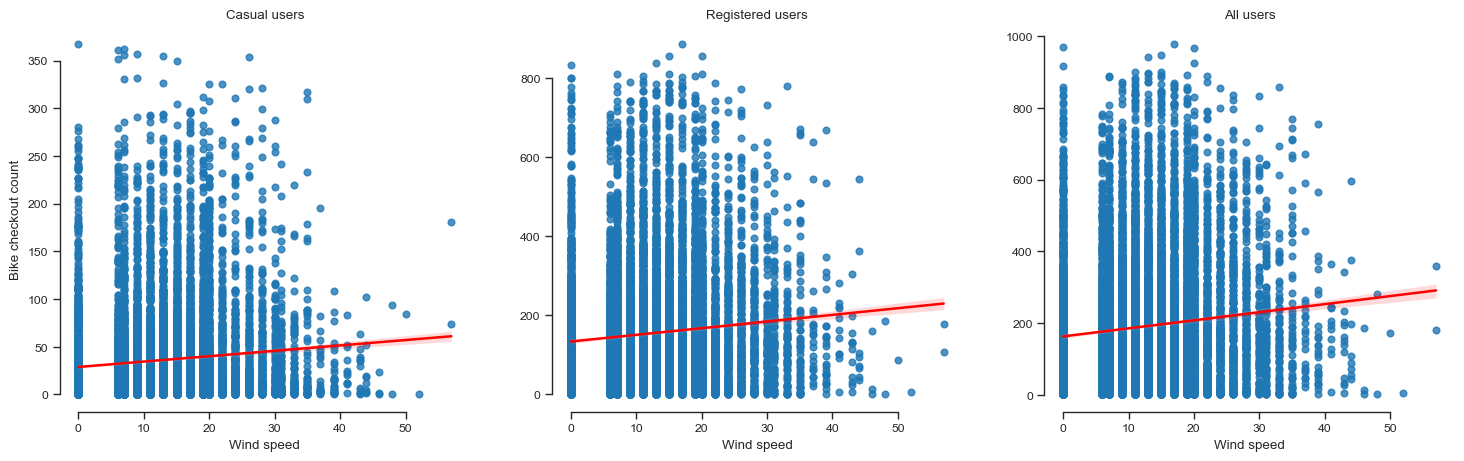

In [21]:
order = 1
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
# Can be done like this:
# sns.barplot(data=bike.resample("M").mean(), y="count", x=bike.resample("M").mean().index.month)
# Or just use the previously created variable:
sns.regplot(
    ax=ax1,
    data=bike,
    x="windspeed",
    y="casual",
    order=order,
    line_kws={"color": "red"},
)
ax1.set_title("Casual users")
ax1.set_ylabel("Bike checkout count")
ax1.set_xlabel("Wind speed")
sns.regplot(
    ax=ax2,
    data=bike,
    x="windspeed",
    y="registered",
    order=order,
    line_kws={"color": "red"},
)
ax2.set_title("Registered users")
ax2.set_xlabel("Wind speed")
ax2.set_ylabel("")
sns.regplot(
    ax=ax3,
    data=bike,
    x="windspeed",
    y="count",
    order=order,
    line_kws={"color": "red"},
)
ax3.set_title("All users")
ax3.set_xlabel("Wind speed")
ax3.set_ylabel("")
sns.despine(trim=True)


Humidity against rentals

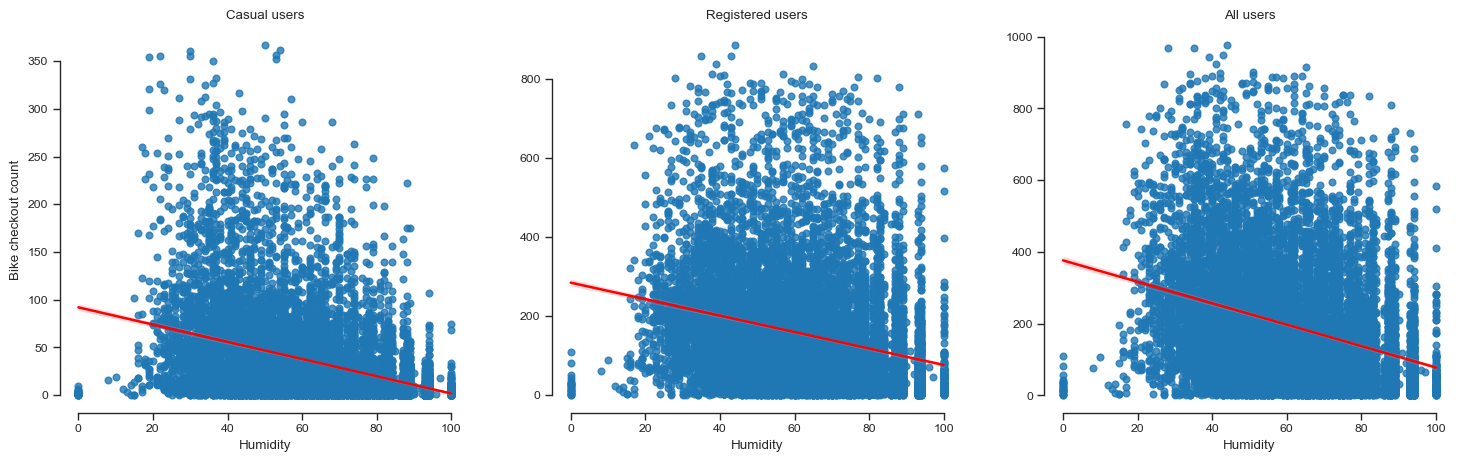

In [22]:
order = 1
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
# Can be done like this:
# sns.barplot(data=bike.resample("M").mean(), y="count", x=bike.resample("M").mean().index.month)
# Or just use the previously created variable:
sns.regplot(
    ax=ax1,
    data=bike,
    x="humidity",
    y="casual",
    order=order,
    line_kws={"color": "red"},
)
ax1.set_title("Casual users")
ax1.set_ylabel("Bike checkout count")
ax1.set_xlabel("Humidity")
sns.regplot(
    ax=ax2,
    data=bike,
    x="humidity",
    y="registered",
    order=order,
    line_kws={"color": "red"},
)
ax2.set_title("Registered users")
ax2.set_xlabel("Humidity")
ax2.set_ylabel("")
sns.regplot(
    ax=ax3,
    data=bike,
    x="humidity",
    y="count",
    order=order,
    line_kws={"color": "red"},
)
ax3.set_title("All users")
ax3.set_xlabel("Humidity")
ax3.set_ylabel("")
sns.despine(trim=True)


Temperature against rentals

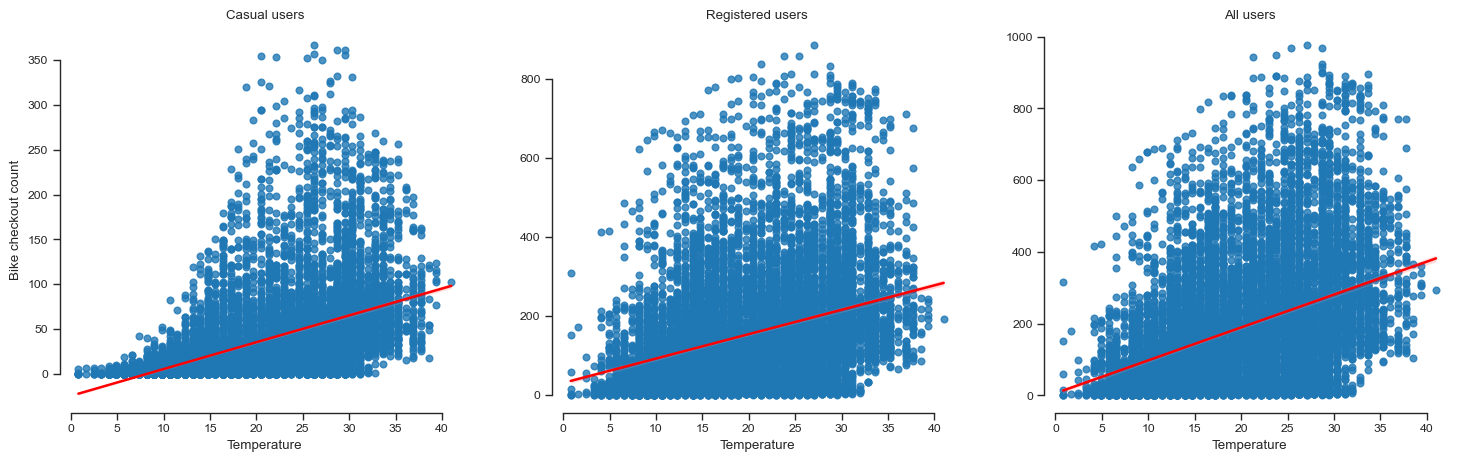

In [23]:
order = 1
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
# Can be done like this:
# sns.barplot(data=bike.resample("M").mean(), y="count", x=bike.resample("M").mean().index.month)
# Or just use the previously created variable:
sns.regplot(
    ax=ax1,
    data=bike,
    x="temp",
    y="casual",
    order=order,
    line_kws={"color": "red"},
)
ax1.set_title("Casual users")
ax1.set_ylabel("Bike checkout count")
ax1.set_xlabel("Temperature")
sns.regplot(
    ax=ax2,
    data=bike,
    x="temp",
    y="registered",
    order=order,
    line_kws={"color": "red"},
)
ax2.set_title("Registered users")
ax2.set_xlabel("Temperature")
ax2.set_ylabel("")
sns.regplot(
    ax=ax3,
    data=bike,
    x="temp",
    y="count",
    order=order,
    line_kws={"color": "red"},
)
ax3.set_title("All users")
ax3.set_xlabel("Temperature")
ax3.set_ylabel("")
sns.despine(trim=True)


Polynomial regression line for day of year against rentals for each year seperately

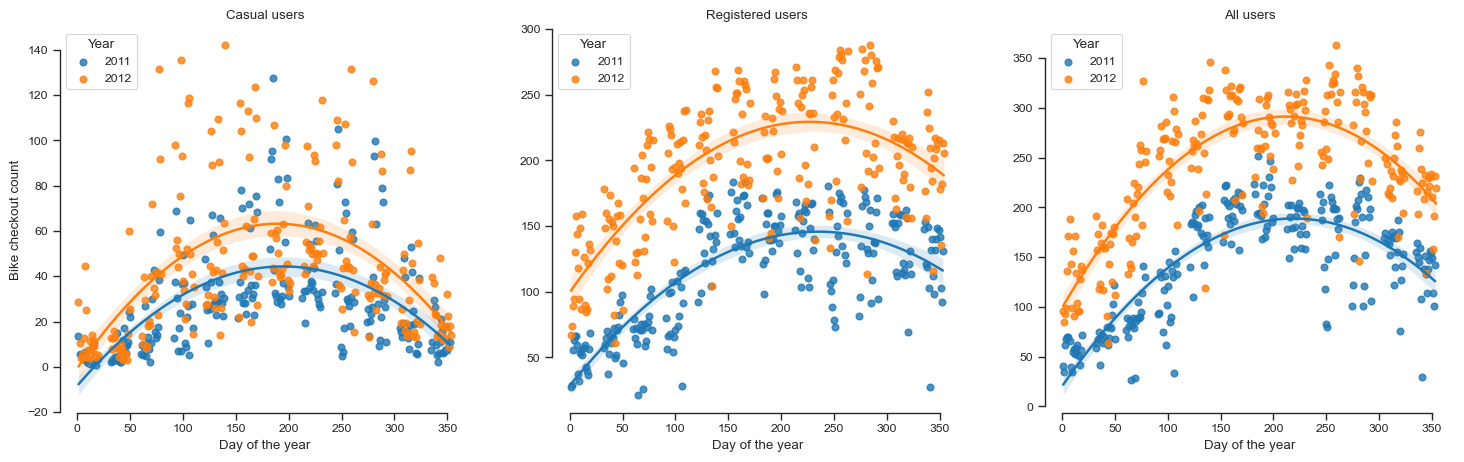

In [24]:
bike_plot = (
    bike[["temp", "casual", "registered", "count", "Year", "Month", "Day of Year"]]
    .resample("D")
    .mean()
    .dropna()
)
bike_plot["Year"] = bike_plot["Year"].apply(int)
order = 2

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
sns.regplot(
    data=bike_plot.loc[bike_plot["Year"] == 2011],
    x="Day of Year",
    y="casual",
    order=order,
    ax=ax1,
    label="2011",
)
sns.regplot(
    data=bike_plot.loc[bike_plot["Year"] == 2012],
    x="Day of Year",
    y="casual",
    order=order,
    ax=ax1,
    label="2012",
)
ax1.set_title("Casual users")
ax1.set_ylabel("Bike checkout count")
ax1.set_xlabel("Day of the year")
ax1.legend(title="Year", loc="upper left")
sns.regplot(
    data=bike_plot.loc[bike_plot["Year"] == 2011],
    x="Day of Year",
    y="registered",
    order=order,
    ax=ax2,
    label="2011",
)
sns.regplot(
    data=bike_plot.loc[bike_plot["Year"] == 2012],
    x="Day of Year",
    y="registered",
    order=order,
    ax=ax2,
    label="2012",
)
ax2.set_title("Registered users")
ax2.set_xlabel("Day of the year")
ax2.set_ylabel("")
ax2.legend(title="Year", loc="upper left")
sns.regplot(
    data=bike_plot.loc[bike_plot["Year"] == 2011],
    x="Day of Year",
    y="count",
    order=order,
    ax=ax3,
    label="2011",
)
sns.regplot(
    data=bike_plot.loc[bike_plot["Year"] == 2012],
    x="Day of Year",
    y="count",
    order=order,
    ax=ax3,
    label="2012",
)
ax3.set_title("All users")
ax3.set_xlabel("Day of the year")
ax3.set_ylabel("")
ax3.legend(title="Year", loc="upper left")
sns.despine(trim=True)


Week day against rentals for each year seperately

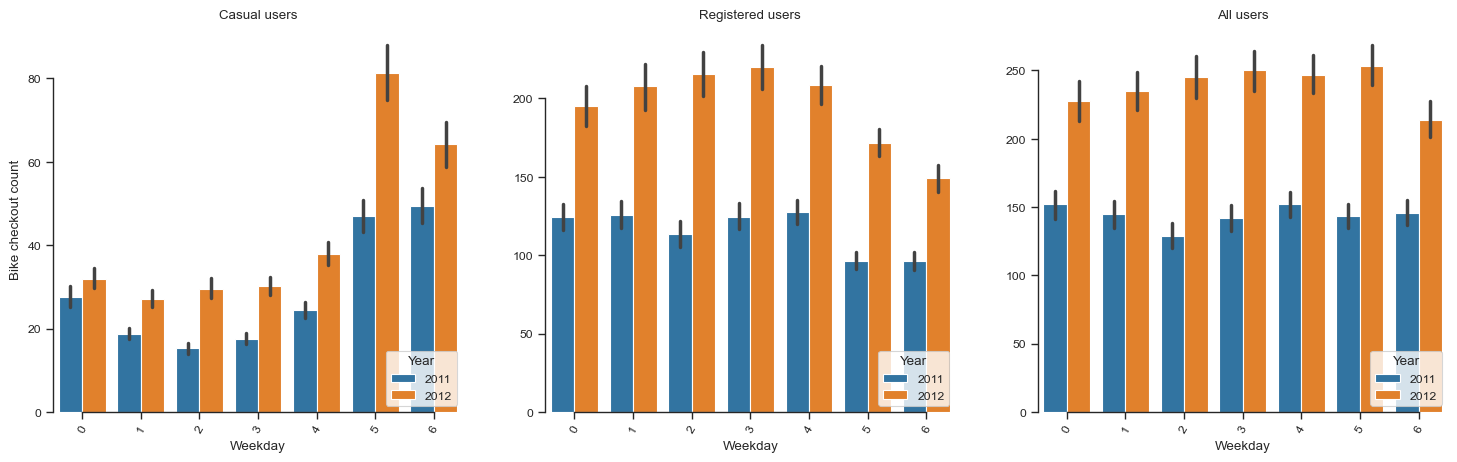

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
# Can be done like this:
# sns.barplot(data=bike.resample("M").mean(), y="count", x=bike.resample("M").mean().index.month)
# Or just use the previously created variable:
sns.barplot(
    ax=ax1,
    data=bike,
    x="Weekday",
    y="casual",
    hue="Year",
    errwidth=2.5,
)
ax1.set_title("Casual users")
ax1.set_ylabel("Bike checkout count")
ax1.set_xlabel("Weekday")
ax1.legend(title="Year", loc="lower right")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)
sns.barplot(
    ax=ax2,
    data=bike,
    x="Weekday",
    y="registered",
    hue="Year",
    errwidth=2.5,
)
ax2.set_title("Registered users")
ax2.set_xlabel("Weekday")
ax2.set_ylabel("")
ax2.legend(title="Year", loc="lower right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60)
sns.barplot(
    ax=ax3,
    data=bike,
    x="Weekday",
    y="count",
    hue="Year",
    errwidth=2.5,
)
ax3.set_title("All users")
ax3.set_xlabel("Weekday")
ax3.set_ylabel("")
ax3.legend(title="Year", loc="lower right")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=60)
sns.despine(trim=True)


Hour of the day against rentals for each year seperately

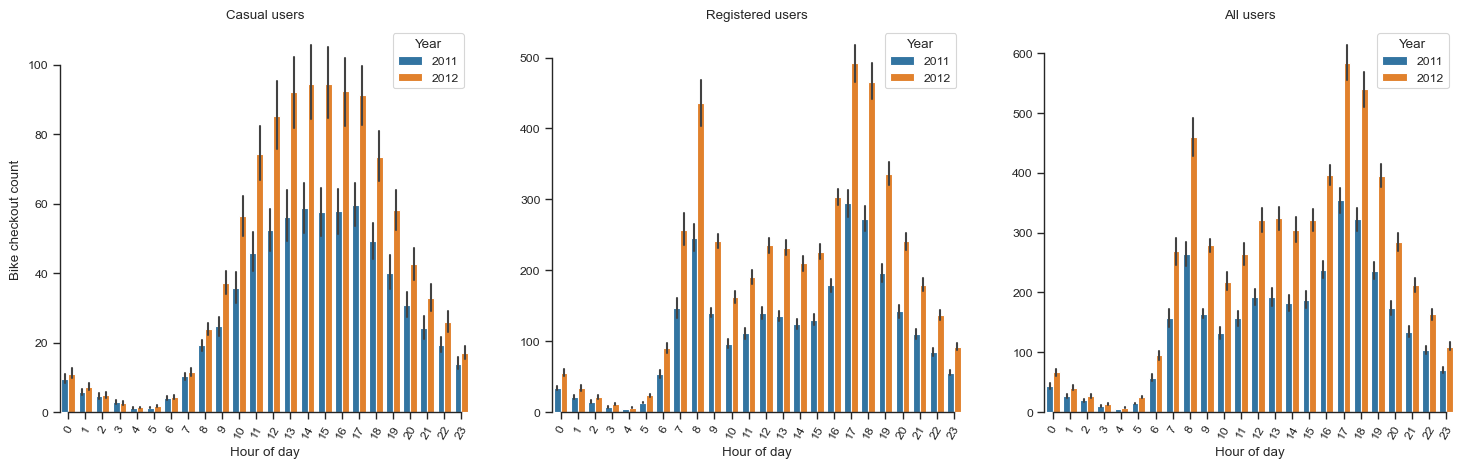

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
# Can be done like this:
# sns.barplot(data=bike.resample("H").mean(), y="count", x=bike.resample("H").mean().index.hour)
# Or just use the previously created variable:
sns.barplot(
    ax=ax1,
    data=bike,
    x="Hour",
    y="casual",
    hue="Year",
    errwidth=1.5,
)
ax1.set_title("Casual users")
ax1.set_ylabel("Bike checkout count")
ax1.set_xlabel("Hour of day")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)
sns.barplot(
    ax=ax2,
    data=bike,
    x="Hour",
    y="registered",
    hue="Year",
    errwidth=1.5,
)
ax2.set_title("Registered users")
ax2.set_xlabel("Hour of day")
ax2.set_ylabel("")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60)
sns.barplot(
    ax=ax3,
    data=bike,
    x="Hour",
    y="count",
    hue="Year",
    errwidth=1.5,
)
ax3.set_title("All users")
ax3.set_xlabel("Hour of day")
ax3.set_ylabel("")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=60)
sns.despine(trim=True)


Hour of day against rentals for each working day level seperately

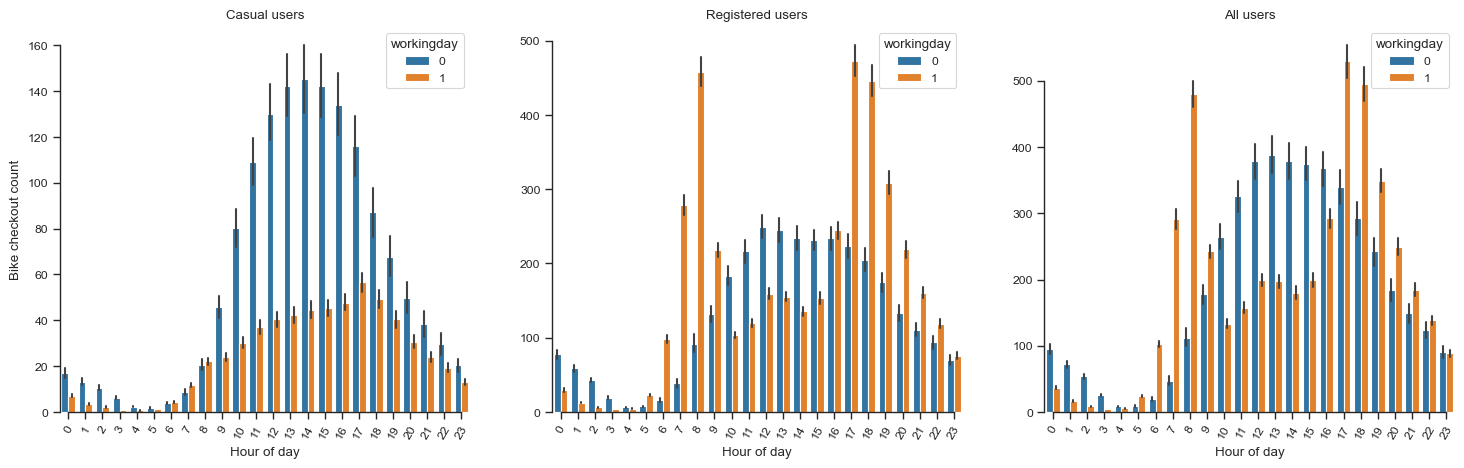

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
# Can be done like this:
# sns.barplot(data=bike.resample("H").mean(), y="count", x=bike.resample("H").mean().index.hour)
# Or just use the previously created variable:
sns.barplot(
    ax=ax1,
    data=bike,
    x="Hour",
    y="casual",
    hue="workingday",
    errwidth=1.5,
)
ax1.set_title("Casual users")
ax1.set_ylabel("Bike checkout count")
ax1.set_xlabel("Hour of day")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60)
sns.barplot(
    ax=ax2,
    data=bike,
    x="Hour",
    y="registered",
    hue="workingday",
    errwidth=1.5,
)
ax2.set_title("Registered users")
ax2.set_xlabel("Hour of day")
ax2.set_ylabel("")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60)
sns.barplot(
    ax=ax3,
    data=bike,
    x="Hour",
    y="count",
    hue="workingday",
    errwidth=1.5,
)
ax3.set_title("All users")
ax3.set_xlabel("Hour of day")
ax3.set_ylabel("")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=60)
sns.despine(trim=True)

##### A few things become clear after EAD:
- Overall, features are balanced. Except for `weather`'s level `heavy rain`. This has to be rectified before proceeding
- There is a lot of non-linearity in the data. We should consider modelling this.
- There are quite a few interactive relatinships, especially with time. Again, this should be considered when modelling.